# Iterators and generators
------------------

[Corey Schafer. Python Tutorial: Iterators and Iterables](https://www.youtube.com/watch?v=jTYiNjvnHZY)

[Corey Schafer. Python Coding Problem: Creating Your Own Iterators](https://www.youtube.com/watch?v=C3Z9lJXI6Qw)

Fluent Python by Luciano Ramalho, CHAPTER 14

## 1. Iterators
--------------

* Iteration is fundamental to data processing
* Scanning datasets that don’t fit in memory, we need a way to fetch the items **lazily** --  one at a time and on demand -- this is what the Iterator pattern is about

### 1.1. Using iterators:
-----------------
* for loops
* collection types construction and extension
* looping over text files line by line
* list, dict and set comprehensions
* tuple unpacking
* unpacking actual parameters with * in function calls

### 1.2. Iterability based on built-in ``iter()``
---------------

* Executing of the  built-in ``iter(x)`` for iterable object ``x``:
    1. Checks whether the object implements ``__iter__`` and calls that to obtain an iterator;
    2. If ``__iter__`` is not implemented, but ``__getitem__`` is implemented, Python creates an iterator that attempts to fetch items in order, starting from index 0 ;
    3. If that fails, Python raises ``TypeError``, usually saying ```"'C' object is not iterable"```, where ``C`` is the class of the target object.

In [ ]:
import reprlib

In [ ]:
class Sentence:
    """v.1.0 --  A simple class with standard set of the operators including
       __len__ and __getitem__
    """

    def __init__(self, text):
        self.text = text
        self.words = self.text.split()  
    def __repr__(self):
        return f'Sentence({reprlib.repr(self.text)})' 
    
    #---------------------------
    def __getitem__(self, index):
        return self.words[index]  

    def __len__(self, index):  
        return len(self.words)

    

In [ ]:
s = Sentence('The time has come')

In [ ]:
for word in s: # s must be Iterable
    print(type(word),word)

In [ ]:
dir(s) # there isn't __iter__

In [ ]:
ls=list(s)
dir(ls) #there is __iter__ in buit-in sequences

* Any Python sequence is iterable: they all implement ``__getitem__``
* Standard sequences also implement ``__iter__`` ( yours should too), because the special handling of ``__getitem__`` exists for backward compatibility reasons
* When the iteration is attempted on a non-iterable, the exception is clear enough: ``TypeError: 'C' object is not iterable``

### 1.3. GoF: Iterable & Iterator
--------------

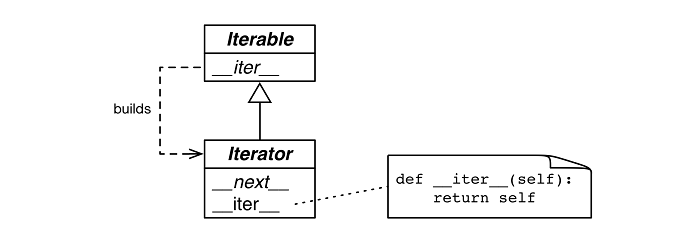

Design Pattern (DP) definition:

1) a **description** of the interaction of objects and classes 

2) designed to solve the **general** design problem

3) in a **specific** context.

**Applicability of Iterator**:
* to access an aggregate object’s contents without exposing its internal representation
* to support multiple traversals of aggregate objects
* to provide a uniform interface for traversing different aggregate structures (to support polymorphic iteration)

In [ ]:
s = 'ABC' # the sequence -- there is __iter__

### 1.4. Explicit iteration with ``iter()`` and ``next()``
-----------------

In [ ]:
it = iter(s) 
print(it)

In [ ]:
next(it)

In [ ]:
next(it)

In [ ]:
next(it)

In [ ]:
next(it)

### 1.5. Explicit loop iteration with ``iter()`` and ``next()``
----------------

In [ ]:
it = iter(s) # explicit loop iteration with iter() and next()
print(it)
while True:
    try:
        print(next(it)) 
    except StopIteration: 
        del it 
        break

### 1.6. Implicit loop iteration ( implicit ``iter()`` and ``next()`` calls )
--------------

In [ ]:
for char in s:
    print(char)

#### Iterable
* Any object from which  built-in ``iter()`` can obtain an **iterator** 
* Objects, which implement an ``__iter__`` returning an iterator, are iterable
* Sequences are always iterable; so as are objects implementing a ``__getitem__`` method which takes 0-based indexes.

#### Iterator

* Any object that implements the ``__next__`` no-argument method which returns the next item in a series or raises ``StopIteration`` when there are no more items 
* Iterators also implement the ``__iter__`` method so they are iterable as well

### 1.7. Example of Iterator implementation
--------------

In [ ]:
import reprlib

class Sentence:
    """v.2.0 --  A simple class with standard set of the operators including
       __iter__
    """

    def __init__(self, text):
        self.text = text

    def __repr__(self):
        return f'Sentence({reprlib.repr(self.text)})'
    
    #-------------------------

    def __iter__(self):  
        return SentenceIterator(self.text.split())  


In [ ]:
class SentenceIterator:
    """v.2.0 --  A simple Iterator implementation
    """

    def __init__(self, words):
        self.words = words   
        self.index = 0   
    # ---------------------------
    def __next__(self):
        try:
            word = self.words[self.index]   
        except IndexError:
            raise StopIteration()   
        self.index += 1   
        return word  

    def __iter__(self):   
        return self

In [ ]:
s = Sentence('The time has come')

In [ ]:
it = iter(s) 
print(it)

In [ ]:
dir(it) #there is  __iter__

In [ ]:
while True:
    try:
        print(next(it))  
    except StopIteration:  
        del it  
        break

In [ ]:
for char in s:
    print(char)

## 2. Generator function
----------------
[Corey Schafer.Python Tutorial: Generators](https://www.youtube.com/watch?v=bD05uGo_sVI)

### 2.1. Simple generator object
-------------

In [ ]:
def gen_123():
    yield 1
    yield 2
    yield 3

"yield" ==  "produce or provide (a natural, agricultural, or industrial product)"

In [ ]:
print(gen_123)

In [ ]:
g = gen_123()
print(g)

In [ ]:
dir(gen_123())

* When invoked, gen_123() returns a **generator** object, wich implemets pattern **Iterator**:

In [ ]:
for i in gen_123(): 
    print(i)

* Generators are iterators that on ``next()`` produce the values of the expressions passed to ``yield``

In [ ]:
g= gen_123()

In [ ]:
next(g)

* Since g is an iterator ``next(g)`` fetches the next item produced by ``yield``

In [ ]:
next(g)

In [ ]:
g1= gen_123()

In [ ]:
next(g1)

In [ ]:
next(g)

In [ ]:
next(g)

* When the body of the function completes, according to the pattern **Iterator** the generator object raises a ``StopIteration``

* Interaction between a loop and the body of the function:

In [ ]:
def gen_AB():
    print('start')
    yield 'A' 
    print('continue')
    yield 'B' 
    print('end.')

* ``for`` does the equivalent of ``g = iter(gen_AB())`` to get a generator object, and then ``next(g)`` at each iteration

In [ ]:
for c in gen_AB(): 
    print('-->', c)

In [ ]:
import random
import time

names = ['John', 'Corey', 'Adam', 'Steve', 'Rick', 'Thomas']
majors = ['Math', 'Engineering', 'CompSci', 'Arts', 'Business']

In [ ]:
def people_list(num_people):
    result = []
    for i in range(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        result.append(person)
    return result

In [ ]:
%timeit people_list(1000000)

In [ ]:
def people_generator(num_people):
    for i in range(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        yield person

In [ ]:
%timeit people_generator(1000000)

In [ ]:
%timeit list(people_generator(1000000))

### 2.2. An implementation of lazy iterations 
--------------

In [ ]:
import reprlib

class Sentence:
    """v.3.0 --  A simple class with __iter__ by generator
    """

    def __init__(self, text):
        self.text = text
        self.words = self.text.split()

    def __repr__(self):
        return f'Sentence({reprlib.repr(self.text)})'

    def __iter__(self):
        for word in self.words: 
            yield word  

In [ ]:
s = Sentence('The time has come')

In [ ]:
it = iter(s) 
print(it)

i=0
while True:
    try:
        print(i, next(it))
        i+=1
    except StopIteration:
        del it 
        break

In [ ]:
for w in s:
    print(w)

* ``Sentence.__iter__`` is generator function which, when called, builds a generator object which implements the iterator interface, so ``SentenceIterator`` class is no longer needed.

* Second version of ``Sentence`` is much shorter than the first, but **it’s not as lazy as it could be**, because the ``__init__`` builds a list of all words in the text to the ``self.words``. A lazy implementation postpones producing values to the last possible moment; this saves memory and may avoid useless processing as well. 

In [ ]:
import re
import reprlib

RE_WORD = re.compile('\w+')
#help(re.compile('\w+'))

class Sentence:
    """v.3.1 --  A simple class with  
            __iter__ by generator without list
    """

    def __init__(self, text):
        self.text = text  

    def __repr__(self):
        return f'Sentence({reprlib.repr(self.text)})' 
        
    def __iter__(self):
        for match in RE_WORD.finditer(self.text):  
            yield match.group()  

[Corey Schafer. Python Tutorial: re Module](https://www.youtube.com/watch?v=K8L6KVGG-7o)

* eager evaluation -- ``re.findall()`` returns a list with all non-overlapping matches of the **regular expression**, as a list of strings
* lazy evaluation : 
    * ``re.finditer()`` returns a generator producing ``re.MatchObject`` instances on demand
    * ``match.group()`` extracts the actual matched text from ``MatchObject`` instance 

If there are many matches, ``re.finditer`` saves a lot of memory. Using it, this version of ``Sentence`` is lazy: it only produces the next word when it is needed.


In [ ]:
s = Sentence('"The time has come," the Walrus said,')

In [ ]:
it = iter(s) 
print(type(it),it)

i=0
while True:
    try:
        print(i, next(it))
        i+=1
    except StopIteration: 
        del it 
        break

In [ ]:
for char in s:
    print(char)

## 3. Using of generator expressions in sequence comprehensions 
--------------
[Corey Schafer. Python Tutorial: Comprehensions](https://www.youtube.com/watch?v=3dt4OGnU5sM&t=904s)

#### 3.1. Advantages of generator over a list
--------------

In [ ]:
def square_numbers(nums):
    for i in nums:
        yield (i*i)

In [ ]:
square_nums = square_numbers([1,2,3,4,5])

In [ ]:
for i in square_nums:
    print(type(i),i)
    #print (i)

In [ ]:
print(square_nums)

In [ ]:
type(square_nums)

In [ ]:
len(square_nums)

In [ ]:
square_nums = ( x*x for x in [1,2,3,4,5]) # x*x <-- generator expression

In [ ]:
print(square_nums)

Immediate **advantage** of generator over a list : 
* don't hold the entire result in memory (in the case of tens of thousands or even millions of items)
* yields one result at a time
* is much more readable
* can be used in list comprehension

In [ ]:
square_nums = [x*x for x in [1,2,3,4,5]]

In [ ]:
print(square_nums)

In [ ]:
square_nums = list([x*x for x in [1,2,3,4,5]])

In [ ]:
square_even_nums = [x*x for x in [1,2,3,4,5] if x%2 == 0]
print(square_even_nums)

In [ ]:
square_even_nums = ( x*x for x in [1,2,3,4,5]if x%2 == 0) # x*x <-- generator expression

In [ ]:
type(square_even_nums)

In [ ]:
for i in square_even_nums:
    print (i)

#### 3.2. List comprehension
_______________________________

In [ ]:
# a (letter, num) pair for each letter in 'abcd' and each number in '0123'

# v.0 --nested loops
my_list = []
for letter in 'abcd':
    for num in range(4):
        my_list.append((letter,num))

In [ ]:
print (my_list)

In [ ]:
# v.1 --list comprehension
my_list= [(letter, num)for letter in 'abcd'  for num in range(4)]

In [ ]:
print (my_list)

#### 3.3. Dictionary comprehension
____________________

In [ ]:
names = ['Bruce', 'Clark', 'Peter', 'Logan', 'Wade']
heros = ['Batman', 'Superman', 'Spiderman', 'Wolverine', 'Deadpool']

print (zip(names, heros)) # zip returns a list of tuples

In [ ]:
# I want a dict{'name': 'hero'} for each (name,hero) in zip(names, heros)

# v.0 --nested loops
my_dict = {}
for name, hero in zip(names, heros):
    my_dict[name] = hero
    
print (my_dict)

In [ ]:
# v.1 -- dictionary comprehension
my_dict = {name: hero for name, hero in zip(names, heros)}

In [ ]:
print (my_dict)

In [ ]:
my_dict = {name: hero for name, hero in zip(names, heros) if name !='Peter'}

In [ ]:
print (my_dict)

#### 3.4. Set comprehension
_________________

In [ ]:
nums = [1,1,2,1,3,4,3,4,5,5,6,7,8,7,9,9]

# v.0 --using loop
my_set = set()
for n in nums:
    my_set.add(n)
    
print (my_set)

In [ ]:
# v.1 --set comprehension
my_set ={n for n in nums}

In [ ]:
print (my_set)